In [2]:
import pickle
import gzip

In [3]:
with gzip.open("cache/mp_20/data.pkl.gz", "rb") as f:
    mp_20_d = pickle.load(f)

In [7]:
import pandas as pd
mp_20 = pd.concat(mp_20_d.values(), ignore_index=True, axis=0)

In [13]:
mp_20.columns

Index(['site_symmetries', 'elements', 'multiplicity', 'wyckoff_letters',
       'sites_enumeration', 'dof', 'spacegroup_number',
       'sites_enumeration_augmented', 'composition',
       'formation_energy_per_atom', 'band_gap'],
      dtype='object')

In [19]:
bg_by_sg_mean = mp_20.groupby("spacegroup_number").band_gap.mean()
bg_by_sg_std = mp_20.groupby("spacegroup_number").band_gap.std()

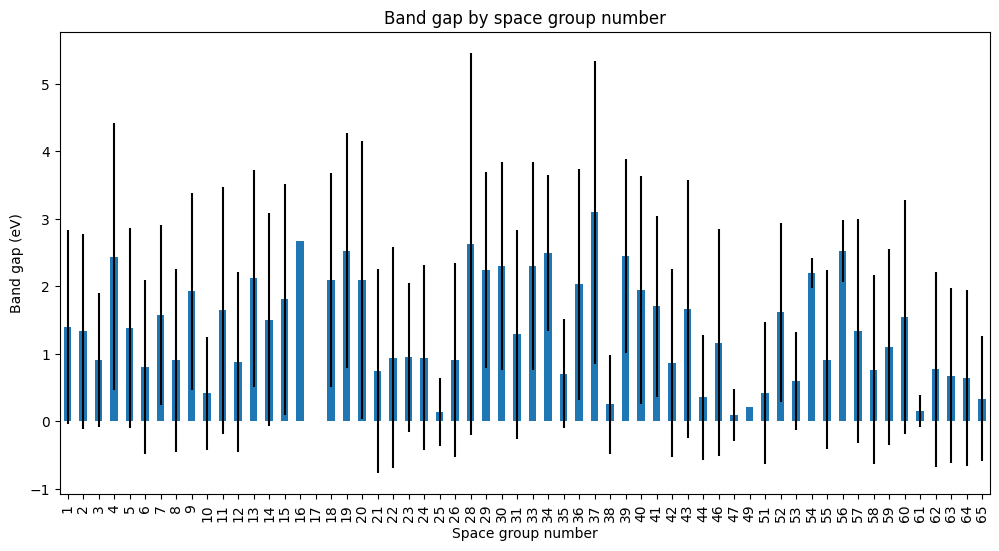

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
bg_by_sg_mean.iloc[:60].plot(kind="bar", yerr=bg_by_sg_std, ax=ax)
ax.set_ylabel("Band gap (eV)")
ax.set_xlabel("Space group number")
ax.set_title("Band gap by space group number");
#ax.set_xticks([]);